In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import pandas as pd


In [15]:
# Load model and data
df = pd.read_csv('exampleValues.csv', skiprows=1)

df['Valores Normalizados'] = df['Valores Normalizados'].astype(str).str.replace(',', '.')
df['Valores Normalizados'] = df['Valores Normalizados'].str.rstrip('%').astype(float)

output = df['Valores Normalizados'].values
print(output)

amplitude_do_impacto = output[0]
tempo_indisponivel = output[2]
sensibilidade = output[4]

values = [sensibilidade, tempo_indisponivel, amplitude_do_impacto]

[92.23   nan 55.63   nan 23.22]


In [16]:
# Functions

def map_value_to_color(value):
    """Map a normalized value to a color."""
    if value > 0.9:
        return (1, 0, 0)
    elif value >= 0.75:
        return (1, 0.5, 0)
    elif value >= 0.5:
        return (1, 1, 0) 
    elif value >= 0.25:
        return (0.5, 1, 0)
    else:
        return (0, 1, 0)

[23.22, 55.63, 92.23]


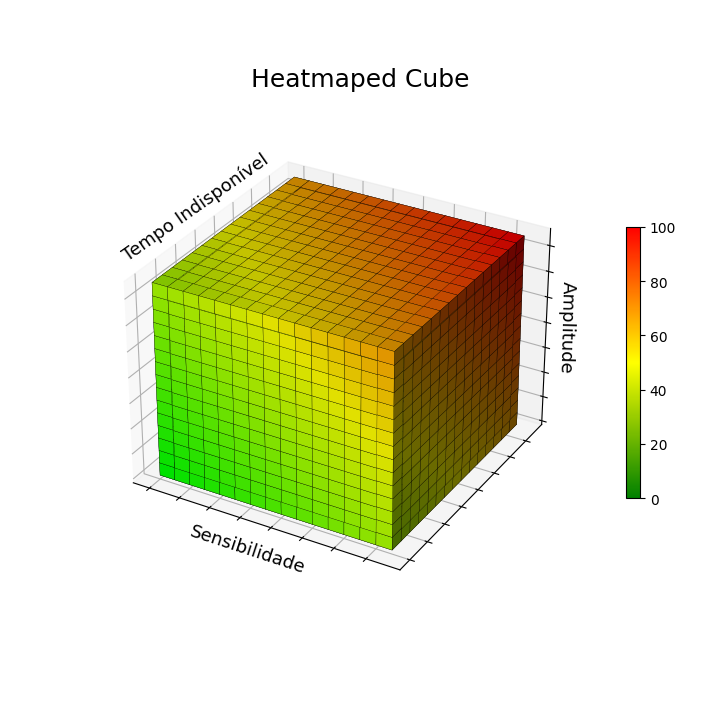

In [17]:
# Plotting configuration

# Getting the values to plot
print(values)
min_value, max_value = 0, 100

# Custom colormap
colors = []
for value in values:
    normalized_value = (value - min_value) / (max_value - min_value)
    colors.append(map_value_to_color(normalized_value))

cmap_name = "custom_graduated_heatmap"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Plotting configuration
axes = [15, 15, 15]
data = np.ones(axes, dtype=np.float32)
x, y, z = np.meshgrid(np.linspace(0, 5, axes[0]),
                      np.linspace(0, 5, axes[1]),
                      np.linspace(0, 5, axes[2]))
heatmap_data = x + y + z
heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
colors = custom_cmap(heatmap_normalized)

# 3D Plotting
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
voxels = ax.voxels(data, facecolors=colors, alpha=1, edgecolor='k', linewidth=0.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# 2D Plotting
ax2d = fig.add_axes([0, 0, 1, 1], frameon=False)
ax2d.set_xticks([])
ax2d.set_yticks([])
ax2d.text(0.5, 0.9, f'Heatmaped Cube', fontsize=18, fontweight='normal', ha='center', va='center')
ax2d.text(0.34, 0.19, f'Sensibilidade', ha="center", va="bottom", fontsize=13, rotation=-18.2)
ax2d.text(0.265, 0.635, f'Tempo Indisponível', ha="center", va="bottom", fontsize=13, rotation=35)
ax2d.text(0.795, 0.48, f'Amplitude', ha="center", va="bottom", fontsize=13, rotation=268.5)

# Colorbar
cmap_name_for_colorbar = "colorbar_heatmap"
colors_for_colorbar = [(0, 'green'), (0.5, 'yellow'), (1, 'red')]
colorbar_cmap = LinearSegmentedColormap.from_list(cmap_name_for_colorbar, colors_for_colorbar)
sm = cm.ScalarMappable(cmap=colorbar_cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.1)


plt.show()